Name: Sandip Anap

# 1. Problem Statement:
   ##  Recognizing hand-written digits
   The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Import data
    I'm using sklearn dataset for this problem.

In [2]:
from sklearn.datasets import load_digits
dataset = load_digits()

# 3. Data preparation

Let's convert data into dataframe.

In [3]:
x = pd.DataFrame(dataset.data)   # features
y = pd.DataFrame(dataset.target) #Lables

In [4]:
x.shape,y.shape

((1797, 64), (1797, 1))

In our data, features set contain 64 columns, each  columns contain gray scale value, 8x8 px image = 64 value

In [5]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

Here is no missing data, also all data in float datatypes.

# 4. Visualize the Dataset.

<Figure size 640x480 with 0 Axes>

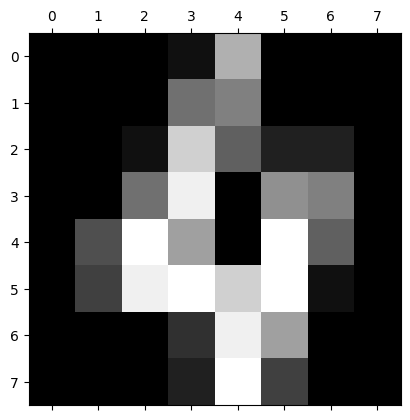

In [8]:
plt.gray()
plt.matshow(dataset.images[4])
plt.show()

<Figure size 640x480 with 0 Axes>

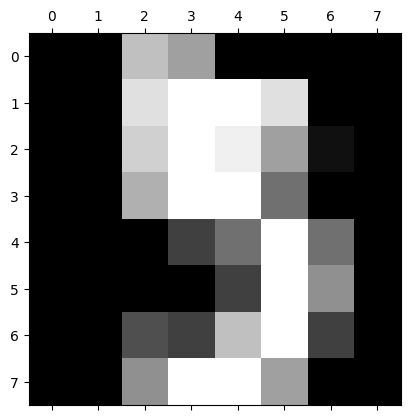

In [9]:
plt.gray()
plt.matshow(dataset.images[5])
plt.show()

# 5. Splitting data into train and test set

I'm giving 80 % data to traing and 20% data to test.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1437, 360, 1437, 360)

Out of 1797 rows, I'm giving 80% i.e. 1487 rows to training model and remaining 20% i.e 360 rows to test set.

# 6. Training Model

In [12]:
from sklearn.svm import SVC

#Import warnings 
import warnings
warnings.filterwarnings("ignore")

# random seed
np.random.seed(42)

model = SVC()
model.fit(x_train,y_train)

SVC()

# 7. Evaluate model

In [13]:
model.score(x_test,y_test)

0.9861111111111112

we've got 98.61 percent accuracy.

In [14]:
# Lets do predictions on x test
y_preds = model.predict(x_test)

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)


array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 41]])

#### Display confusion matrix

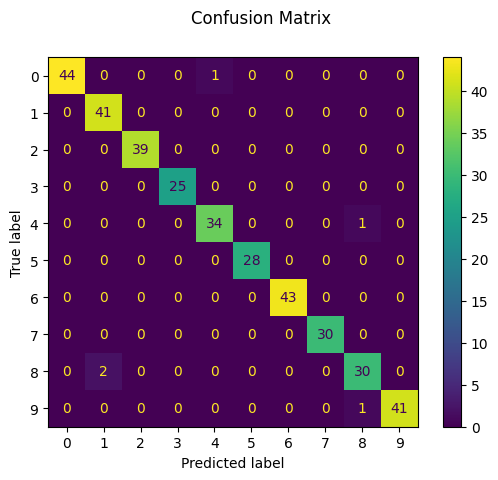

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_preds)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

## Classfication Report 

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.95      1.00      0.98        41
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        25
           4       0.97      0.97      0.97        35
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        30
           8       0.94      0.94      0.94        32
           9       1.00      0.98      0.99        42

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# 8. Hyperparameters Tunning

In [18]:
gs_grid = {'C': [0.1,1, 10, 100], 
           'gamma': [1,0.1,0.01,0.001],
           'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'degree':[3,5,10]}

In [19]:
from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(SVC(),gs_grid,refit=True,verbose=1,cv=5)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 5, 10],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [24]:
gs_model.best_params_

{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}

In [25]:
gs_model.score(x_test,y_test)

0.9944444444444445

In [26]:
y_preds_gs = gs_model.predict(x_test)
y_preds_gs

array([4, 6, 2, 6, 6, 7, 1, 0, 9, 2, 1, 9, 0, 0, 1, 7, 0, 4, 1, 2, 8, 6,
       1, 8, 2, 3, 9, 1, 4, 8, 2, 6, 9, 1, 9, 2, 7, 4, 3, 7, 5, 8, 2, 2,
       5, 7, 5, 6, 1, 0, 2, 3, 0, 5, 9, 6, 3, 8, 0, 8, 3, 9, 9, 9, 9, 4,
       5, 6, 3, 2, 5, 1, 6, 6, 7, 4, 9, 3, 7, 3, 4, 4, 8, 1, 9, 0, 7, 8,
       0, 1, 2, 8, 2, 0, 4, 6, 1, 2, 4, 6, 7, 8, 2, 9, 3, 5, 5, 3, 6, 6,
       0, 5, 0, 2, 7, 7, 8, 5, 3, 5, 8, 5, 6, 2, 6, 1, 0, 2, 0, 8, 1, 5,
       5, 6, 9, 4, 0, 2, 1, 1, 2, 0, 6, 3, 9, 0, 3, 2, 0, 2, 3, 5, 1, 5,
       1, 2, 9, 5, 7, 9, 1, 4, 4, 0, 8, 2, 7, 4, 1, 9, 4, 0, 4, 2, 4, 7,
       6, 8, 1, 1, 7, 6, 9, 9, 1, 0, 0, 7, 5, 8, 6, 4, 2, 0, 4, 3, 0, 1,
       2, 7, 5, 6, 0, 0, 8, 0, 5, 5, 9, 1, 2, 2, 4, 7, 2, 0, 2, 8, 0, 8,
       9, 7, 8, 0, 4, 1, 0, 7, 1, 4, 6, 1, 9, 9, 8, 6, 6, 9, 6, 5, 9, 9,
       9, 6, 8, 4, 9, 6, 5, 5, 3, 0, 7, 3, 2, 4, 0, 1, 3, 6, 1, 0, 7, 6,
       9, 8, 1, 8, 8, 2, 9, 6, 4, 1, 6, 1, 2, 0, 9, 6, 5, 6, 6, 5, 6, 0,
       0, 4, 3, 3, 7, 7, 0, 7, 0, 1, 9, 1, 4, 1, 1,

In [28]:
print(classification_report(y_test,y_preds_gs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39
           3       1.00      0.96      0.98        25
           4       1.00      1.00      1.00        35
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        30
           8       0.97      1.00      0.98        32
           9       1.00      0.98      0.99        42

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# 9. Conclusion

In this notebook, I've solved problem with help of Support vector machine,With help of hyperparameter tunning performace of model is 99% accurate, I'm begginer to ML. Please comment, if any sugguestion or correction.